<a href="https://colab.research.google.com/github/haroon12h08/ThemisAI/blob/main/THEMIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THEMIS - DOCUMENT DIGITALIZATION AND FRADULANT DETECTION


CHEQUES


In [ ]:
!pip install python-dotenv requests opencv-python matplotlib

In [ ]:
import os
import re
import cv2
import requests
import numpy as np
from matplotlib import pyplot as plt
from dotenv import load_dotenv
from google.colab import files

In [ ]:
load_dotenv("/.env")
API_KEY = os.getenv("OCR_KEY")

if not API_KEY:
    raise ValueError("API Key not found. Please check your .env")


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving Cheque 309138.tif to Cheque 309138.tif


In [ ]:
img = cv2.imread(file_name)
height, width = img.shape[:2]
max_dim = 1000
if max(height, width) > max_dim:
    scale = max_dim / max(height, width)
    img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    compressed_name = "compressed_cheque.jpg"
    cv2.imwrite(compressed_name, img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    file_name = compressed_name


In [ ]:
def ocr_space_file(filename, overlay=False, language='eng'):
    payload = {
        'isOverlayRequired': overlay,
        'apikey': API_KEY,
        'language': language,
    }
    with open(filename, 'rb') as f:
        response = requests.post(
            'https://api.ocr.space/parse/image',
            files={filename: f},
            data=payload,
        )
    return response.json()

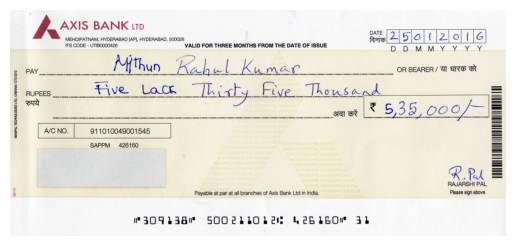

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
def ocr_space_file(filename, overlay=False, language='eng'):
    payload = {
        'isOverlayRequired': overlay,
        'apikey': API_KEY,
        'language': language,
    }
    with open(filename, 'rb') as f:
        r = requests.post(
            'https://api.ocr.space/parse/image',
            files={filename: f},
            data=payload,
        )
    return r.json()

result = ocr_space_file(file_name)

In [ ]:
if "ParsedResults" in result:
    text = result["ParsedResults"][0]["ParsedText"]
    print("🔍 Raw OCR Output:\n", text)

    # Extract fields
    cheque_data = {}

    # Bank Name
    bank_match = re.search(r"(AXIS\s+BANK|HDFC\s+BANK|ICICI\s+BANK|SBI|STATE\s+BANK)", text, re.IGNORECASE)
    cheque_data["bank_name"] = bank_match.group(0).upper() if bank_match else None

    # Payee Name (after 'PAY' or similar)
    payee_match = re.search(r"PAY\s+([A-Za-z ]+)", text, re.IGNORECASE)
    cheque_data["payee_name"] = payee_match.group(1).strip() if payee_match else None

    # Amount in words (before "RUPEES" or "₹")
    amt_words_match = re.search(r"([A-Za-z\s]+)\n?.*RUPEES", text, re.IGNORECASE)
    cheque_data["amt_in_words"] = amt_words_match.group(1).strip() if amt_words_match else None

    # Amount in figures (look for ₹ or numbers with commas)
    amt_num_match = re.search(r"₹?\s?([0-9,]+)", text)
    cheque_data["amt_in_figures"] = amt_num_match.group(1).replace(",", "") if amt_num_match else None

    # Date (dd/mm/yy or dd-mm-yy)
    date_match = re.search(r"(\d{2}[/-]\d{2}[/-]\d{2,4})", text)
    cheque_data["cheque_date"] = date_match.group(1) if date_match else None

    print("\n✅ Structured Output:")
    print(cheque_data)

else:
    print("❌ OCR failed:", result)

🔍 Raw OCR Output:
 PAY
RUPEES
AXIS BANK LTD
HYDERABAD [Am, HYDERABAD,
FS ccoE - UTIBnxx26
I-a-CC
SAPPM 426160
VALID FOR THREE MONTHS FROM THE DATE OF ISSUE
owe S c.
3ßT
Payable at at branches Of Axis Bar* Ltd
D D M MY YYY
OR BEARER /
5354 coo
RAJARSHI PAL
Please above


✅ Structured Output:
{'bank_name': 'AXIS BANK', 'payee_name': 'RUPEES', 'amt_in_words': 'PAY', 'amt_in_figures': '', 'cheque_date': None}


ADHAAR CARD


In [2]:
import os
import re
import cv2
import requests
import numpy as np
from matplotlib import pyplot as plt
from dotenv import load_dotenv
from google.colab import files

In [3]:
load_dotenv("/.env")   # update path if needed
API_KEY = os.getenv("OCR_KEY")

if not API_KEY:
    raise ValueError("API Key not found. Please check your .env file")

ValueError: API Key not found. Please check your .env file

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving Screenshot 2025-09-03 105339.png to Screenshot 2025-09-03 105339.png


In [ ]:
img = cv2.imread(file_name)
height, width = img.shape[:2]
max_dim = 1000
if max(height, width) > max_dim:
    scale = max_dim / max(height, width)
    img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    compressed_name = "compressed_aadhaar.jpg"
    cv2.imwrite(compressed_name, img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    file_name = compressed_name

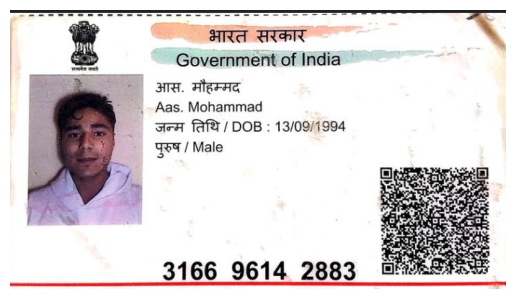

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
def ocr_space_file(filename, overlay=False, language='eng'):
    payload = {
        'isOverlayRequired': overlay,
        'apikey': API_KEY,
        'language': language,
    }
    with open(filename, 'rb') as f:
        r = requests.post(
            'https://api.ocr.space/parse/image',
            files={filename: f},
            data=payload,
        )
    return r.json()

In [ ]:
def extract_aadhaar_data(text):
    aadhaar_data = {}

    # Aadhaar Number
    aadhaar_match = re.search(r"\b(\d{4}\s\d{4}\s\d{4})\b", text)
    aadhaar_data["aadhaar_number"] = aadhaar_match.group(1) if aadhaar_match else None

    # Clean headers
    HEADER_WORDS = ["GOVERNMENT", "INDIA", "AADHAAR", "BHARAT", "CARD"]

    # Split lines
    lines = [line.strip() for line in text.split("\n") if line.strip()]

    # Extract Name
    name = None
    for line in lines:
        if any(word in line.upper() for word in HEADER_WORDS):
            continue
        if re.search(r"DOB|DATE|MALE|FEMALE|TRANSGENDER|\d{2}[/-]\d{2}[/-]\d{4}", line, re.IGNORECASE):
            continue
        if re.search(r"[A-Za-z]", line):
            name = line
            break
    aadhaar_data["name"] = name

    # Date of Birth
    dob_match = re.search(r"(?:DOB|DoB|जन्म|जन्म तिथि)\s*[:\-]?\s*(\d{2}[/-]\d{2}[/-]\d{4})", text, re.IGNORECASE)
    aadhaar_data["dob"] = dob_match.group(1) if dob_match else None

    # Gender
    gender_match = re.search(r"\b(MALE|FEMALE|पुरुष|महिला|TRANSGENDER)\b", text, re.IGNORECASE)
    if gender_match:
        gender = gender_match.group(1)
        aadhaar_data["gender"] = (
            "Male" if gender.lower() in ["male", "पुरुष"] else
            "Female" if gender.lower() in ["female", "महिला"] else "Transgender"
        )
    else:
        aadhaar_data["gender"] = None

    return aadhaar_data

# Run OCR
result = ocr_space_file(file_name)
if result.get("IsErroredOnProcessing"):
    print(" OCR failed:", result)
else:
    raw_text = result["ParsedResults"][0]["ParsedText"]
    print("Raw OCR Output:\n", raw_text)

    structured_output = extract_aadhaar_data(raw_text)
    print("\n Structured Aadhaar Output:")
    print(structured_output)

Raw OCR Output:
 Government of lhdia
Aas. Mohammad
/ DOB : 13/09/1994
/ Male
3166 9614 2883


 Structured Aadhaar Output:
{'aadhaar_number': '3166 9614 2883', 'name': 'Aas. Mohammad', 'dob': '13/09/1994', 'gender': 'Male'}


PAN CARD


In [ ]:
import os
import re
import requests
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving pan_sample2.png to pan_sample2.png


In [ ]:

API_KEY = os.getenv("OCR_KEY")
if not API_KEY:
    API_KEY = "YOUR_OCR_SPACE_API_KEY"


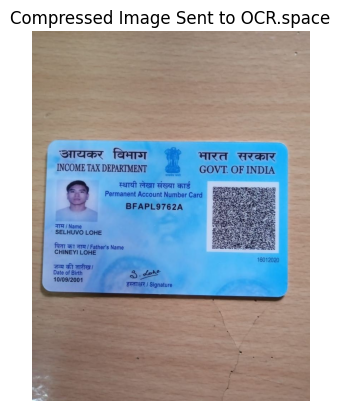

In [ ]:
def compress_image(input_path, output_path="compressed.jpg", max_size_kb=900, step=10):
    img = Image.open(input_path)
    quality = 90
    img.save(output_path, "JPEG", optimize=True, quality=quality)
    while os.path.getsize(output_path) > max_size_kb * 1024 and quality > step:
        quality -= step
        img.save(output_path, "JPEG", optimize=True, quality=quality)
    return output_path

compressed_file = compress_image(file_name)

# 📷 Show the compressed image
plt.imshow(Image.open(compressed_file))
plt.axis("off")
plt.title("Compressed Image Sent to OCR.space")
plt.show()


In [ ]:
def ocr_space_file(filename, overlay=False, language='eng'):
    payload = {'isOverlayRequired': overlay,
               'apikey': API_KEY,
               'language': language}
    with open(filename, 'rb') as f:
        r = requests.post('https://api.ocr.space/parse/image',
                          files={filename: f},
                          data=payload,
                          timeout=180)
    return r.json()

In [ ]:
def extract_pan_data(text):
    pan_data = {}

    # PAN Number (format: 5 letters + 4 digits + 1 letter)
    pan_match = re.search(r"\b([A-Z]{5}[0-9]{4}[A-Z])\b", text)
    pan_data["pan_number"] = pan_match.group(1) if pan_match else None

    # DOB
    dob_match = re.search(r"(\d{2}[/-]\d{2}[/-]\d{4})", text)
    pan_data["dob"] = dob_match.group(1) if dob_match else None

    # Extract lines
    lines = [line.strip() for line in text.split("\n") if line.strip()]

    name, father_name = None, None
    for line in lines:
        if re.search(r"INCOME\s*TAX|DEPARTMENT|GOVT|INDIA|CARD|PERMANENT|ACCOUNT|NUMBER", line, re.IGNORECASE):
            continue
        if not name and re.match(r"^[A-Z\s]+$", line):
            name = line
        elif name and not father_name and re.match(r"^[A-Z\s]+$", line):
            father_name = line

    pan_data["name"] = name
    pan_data["father_name"] = father_name
    return pan_data

# 🚀 Step 5: Run OCR + Extract
result = ocr_space_file(compressed_file)
if result.get("IsErroredOnProcessing"):
    print("OCR failed:", result)
else:
    raw_text = result["ParsedResults"][0]["ParsedText"]
    print("Raw OCR Output:\n", raw_text)

    structured_pan = extract_pan_data(raw_text)
    print("Structured PAN Output:")
    print(structured_pan)

🔍 Raw OCR Output:
 dB
INCOME DEPARTMENT
GOVT. OF INDIA
Permanent Account Number Card
BFAPL9762A
/ Name
SELHUVO LOHE
1 Father's Name
CHINEYI LOHE
Date of Birth
10/09/2001
16012020
1 Signature

✅ Structured PAN Output:
{'pan_number': 'BFAPL9762A', 'dob': '10/09/2001', 'name': 'SELHUVO LOHE', 'father_name': 'CHINEYI LOHE'}
